# **Classification**

# **2. Logistic Regression**

The dependent variables outcome is discrete
 (yes/no, true/false etc).

1.   Binary logistic regression (2 values)
2.   Multi variate logistic regression(multi class classification)

*   Threshold value 0.5
*   'S' curve

linear regression has straight line curve

* performs well on data with linear relationship
* less chance overfitting in low dimension data
* high dimensionality dataset causes overfitting
* difficult to capture complex relationship
* sensitive to  outliers





**Confusion Matrix**

* is a matrix used to evaluate the performance of a classification model,compare the actual value with those predicted by the model
* TP -> correctly predicted the positive case 1->1
* TN -> correctly predicted the negative case 0->0
* FP -> inncorrectly predicted positive case  1->0
* FN -> inncorrectly predicted negative case  0->1

**Classification Report**

is a performance evaluation,that summerizes how well a classifiaction model performs

    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred))


1. Accuracy
2. Precision
* Out of all predictions the model made for a given class, how many were correct?
* TP / (TP + FP)
3. Recall/Sensitivity/True positive rate
* Out of all actual instances of a class, how many did the model correctly
identify?
4. F1 Score -> mean value of precision and recall
5. Support  -> total number of occurances

# **Example 1**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
df.to_csv("Hear.csv")

<Axes: xlabel='age', ylabel='count'>

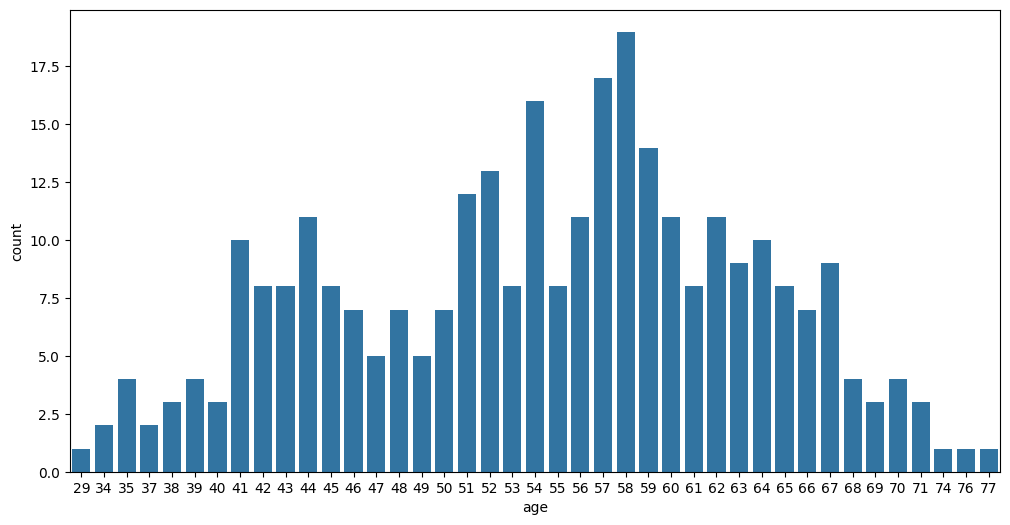

In [ ]:
plt.figure(figsize=(12,6))
sn.countplot(data=df,x='age')

<Axes: xlabel='sex', ylabel='count'>

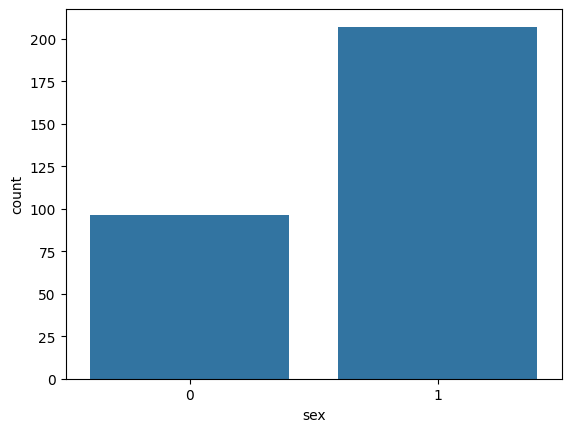

In [ ]:
sn.countplot(data=df,x='sex')

<Axes: xlabel='target', ylabel='count'>

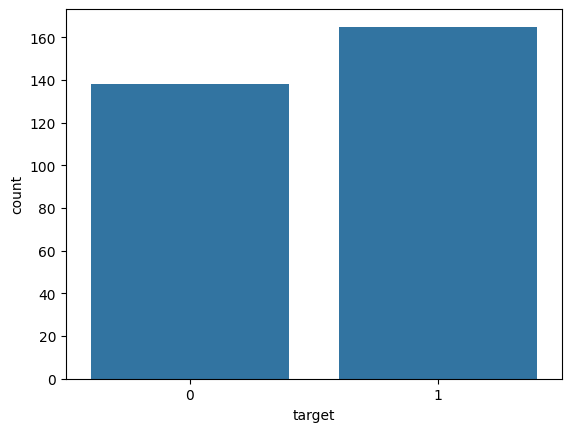

In [ ]:
sn.countplot(data=df,x='target')

In [ ]:
x=df.drop(columns='target')
y=df['target']
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(212, 13) (212,)
(91, 13) (91,)


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 80.22%


[[30 11]
 [ 7 43]]
Axes(0.125,0.11;0.62x0.77)


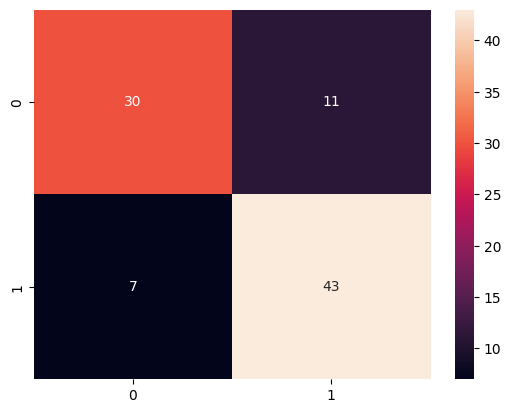

In [ ]:
cm=confusion_matrix(y_test,pred_y) #actual value and predicted value
print(cm)
print(sn.heatmap(cm,annot=True))

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.81      0.73      0.77        41\n           1       0.80      0.86      0.83        50\n\n    accuracy                           0.80        91\n   macro avg       0.80      0.80      0.80        91\nweighted avg       0.80      0.80      0.80        91\n'

In [ ]:
df.head()
a=pd.DataFrame([[23,1,2,125,200,0,1,150,0,1.7,0,0,1]])
prediction=model.predict(a)
if prediction==1:
  print("You have Heart Disease")
else:
  print("You do not have Heart diseses")

You have Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Example 2**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['country']=label_encoder.fit_transform(df['country'])
df['country'].unique()

array([0, 2, 1])

In [ ]:
df['gender']=label_encoder.fit_transform(df['gender'])
df['gender'].unique()

array([0, 1])

In [ ]:
df.dtypes

,0
customer_id,int64
credit_score,int64
country,int64
gender,int64
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


<Axes: xlabel='age', ylabel='count'>

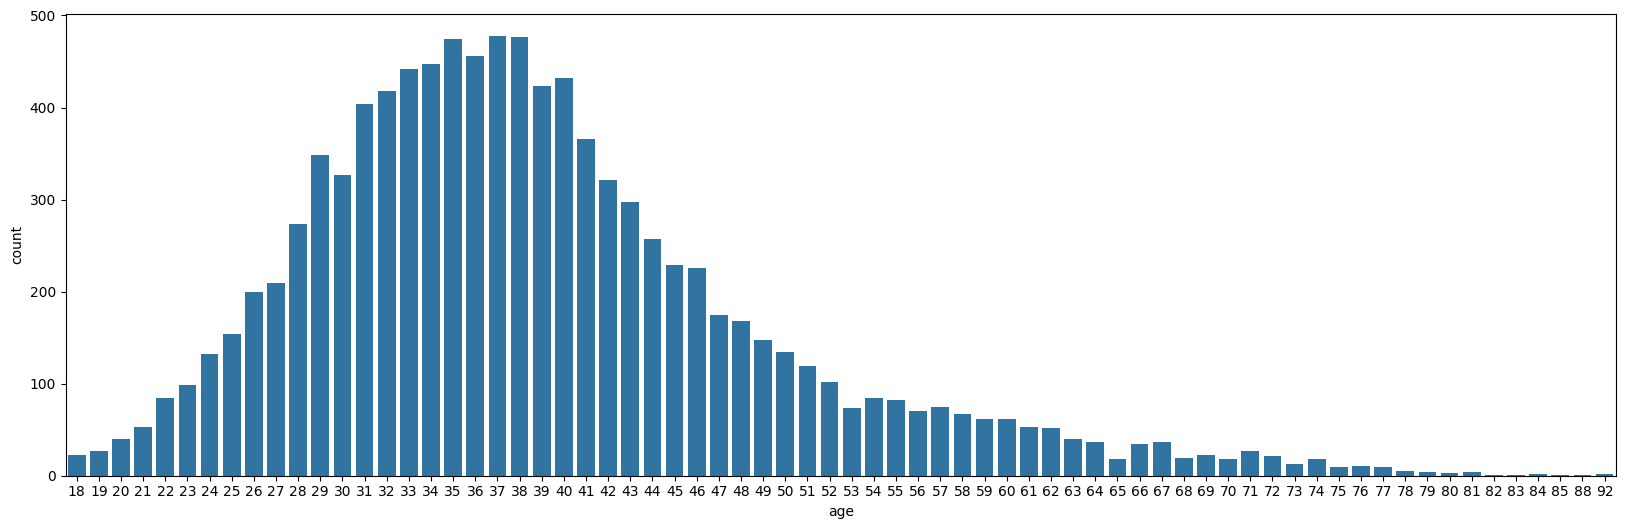

In [ ]:
plt.figure(figsize=(20,6))
sn.countplot(df,x='age')

In [ ]:
x=df.drop(columns='churn')
x.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
y=df['churn']
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 77.87%


[[2302   71]
 [ 593   34]]


<Axes: >

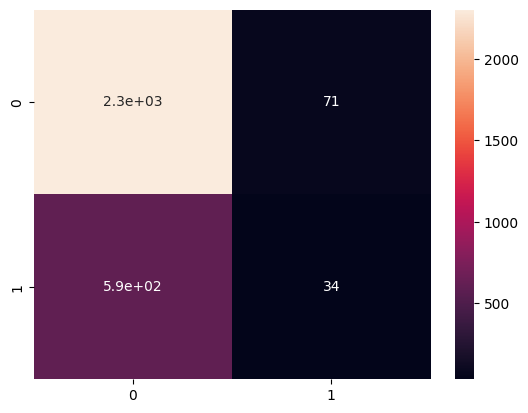

In [ ]:
cm=confusion_matrix(y_test,pred_y)
print(cm)
sn.heatmap(cm,annot=True)

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.80      0.97      0.87      2373\n           1       0.32      0.05      0.09       627\n\n    accuracy                           0.78      3000\n   macro avg       0.56      0.51      0.48      3000\nweighted avg       0.70      0.78      0.71      3000\n'

In [ ]:
df.head()
a=pd.DataFrame([[15657555,1000,2,1,23,5,75000,5,3,1,255750]])
prediction=model.predict(a)
if prediction==1:
  print("Customer will Leave")
else:
  print("Customer will Stay")

Customer will Stay


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Example 3**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [ ]:
df.dtypes

,0
User ID,int64
Gender,int64
Age,int64
EstimatedSalary,int64
Purchased,int64


<Axes: xlabel='Purchased', ylabel='count'>

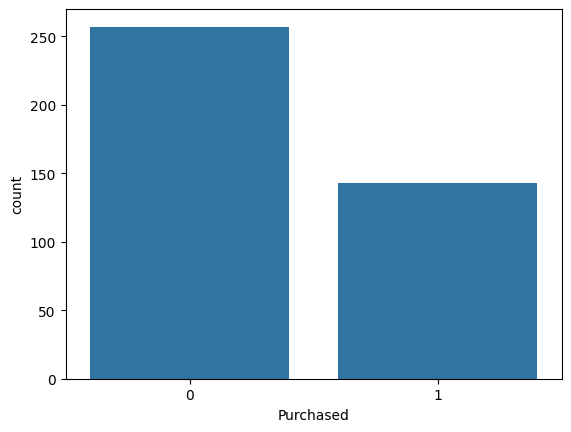

In [ ]:
sn.countplot(df,x='Purchased')

In [ ]:
x=df.drop(columns='Purchased')
x.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000


In [ ]:
y=df['Purchased']
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 83.75%


[[40  8]
 [ 5 27]]


<Axes: >

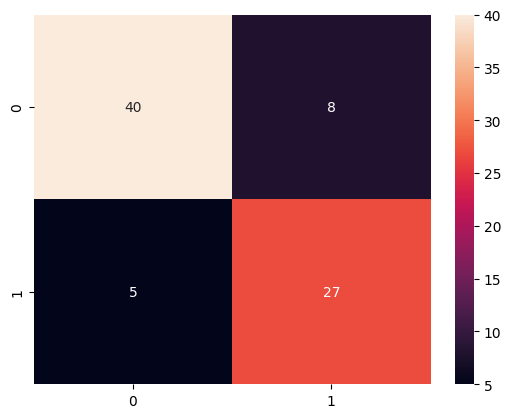

In [ ]:
cm=confusion_matrix(y_test,pred_y)
print(cm)
sn.heatmap(cm,annot=True)

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.89      0.83      0.86        48\n           1       0.77      0.84      0.81        32\n\n    accuracy                           0.84        80\n   macro avg       0.83      0.84      0.83        80\nweighted avg       0.84      0.84      0.84        80\n'

In [ ]:
df.head()
a=pd.DataFrame([[15825610,1,23,35000]])
predict=model.predict(a)
if predict==1:
  print("Purchased Social Network Ad")
else:
  print("Did not purchase Social Network Ad")

Did not purchase Social Network Ad


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Example 4**

# **Airline Customer Satisfation**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Invistico_Airline.csv')
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.tail()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,...,3,4,5,5,5,3,3,3,185,186.0


**Preprocessing**

In [ ]:
df.isna().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [ ]:
df=df.fillna(df['Arrival Delay in Minutes'].mean())

In [ ]:
df.isna().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [ ]:
df.shape

(129880, 22)

In [ ]:
df.dtypes

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


In [ ]:
df['satisfaction']=df['satisfaction'].replace({'satisfied':1,'dissatisfied':0})

/tmp/ipython-input-2937596175.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['satisfaction']=df['satisfaction'].replace({'satisfied':1,'dissatisfied':0})


<Axes: xlabel='Class', ylabel='count'>

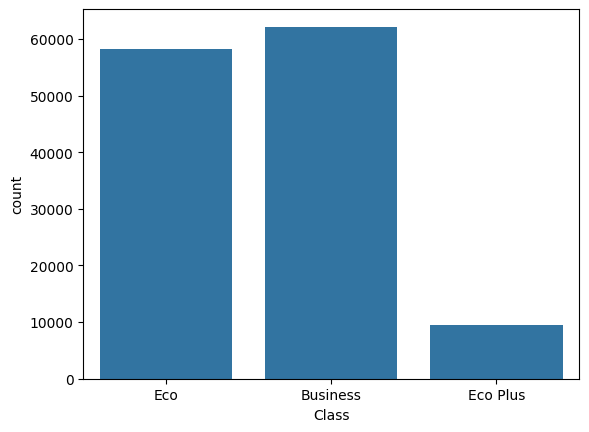

In [ ]:
sn.countplot(df,x='Class')

<Axes: xlabel='Customer Type', ylabel='count'>

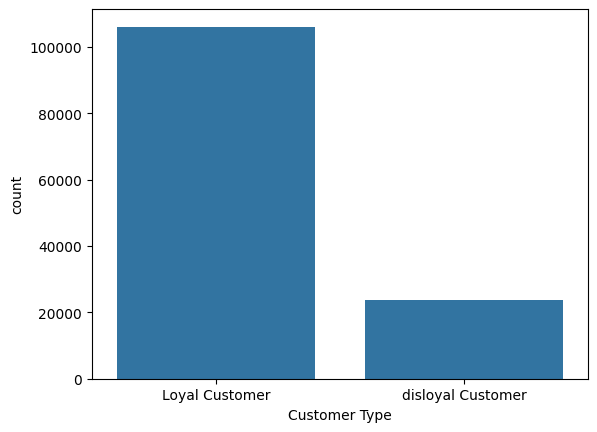

In [ ]:
sn.countplot(df,x='Customer Type')

In [ ]:
df['Customer Type']=df['Customer Type'].replace({'Loyal Customer':1,'disloyal Customer':0})

/tmp/ipython-input-2849625086.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer Type']=df['Customer Type'].replace({'Loyal Customer':1,'disloyal Customer':0})


<Axes: xlabel='Type of Travel', ylabel='count'>

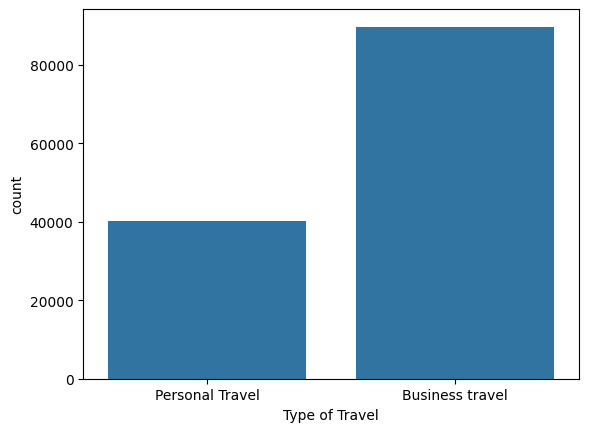

In [ ]:
sn.countplot(df,x='Type of Travel')

In [ ]:
#Personal Travel -> 0
#Business Travel -> 1
df['Type of Travel']=df['Type of Travel'].replace({'Personal Travel':0,'Business travel':1})

/tmp/ipython-input-2288439685.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type of Travel']=df['Type of Travel'].replace({'Personal Travel':0,'Business travel':1})


In [ ]:
df.dtypes

,0
satisfaction,int64
Customer Type,int64
Age,int64
Type of Travel,int64
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Class']=label_encoder.fit_transform(df['Class'])
df['Class'].unique()

array([1, 0, 2])

In [ ]:
df.head()
#eco -> 1
#Business -> 0
#eco plus -> 2

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,65,0,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,47,0,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,1,15,0,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,60,0,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,70,0,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


* Customer Type -> Loyal(1),disloyal(0)
* Class         -> eco(0),business(1),eco plus(2)
* satisfaction  -> satisfied(1),dissatisfied(0)
* type of travel -> personal(0),business(1)

**Training and Testing**

In [ ]:
x=df.drop(columns='satisfaction')
x.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,65,0,1,265,0,0,0,2,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,47,0,0,2464,0,0,0,3,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,15,0,1,2138,0,0,0,3,2,...,2,2,3,3,4,4,4,2,0,0.0
3,1,60,0,1,623,0,0,0,3,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,70,0,1,354,0,0,0,3,4,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
y=df['satisfaction']
y.head()

,satisfaction
0,1
1,1
2,1
3,1
4,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 0, 1, 1])

**Model Evaluation**

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 78.57%


[[12721  5048]
 [ 3302 17893]]


<Axes: >

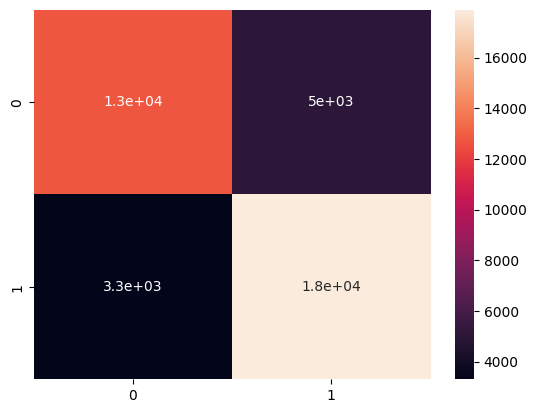

In [ ]:
cm=confusion_matrix(y_test,pred_y)
print(cm)
sn.heatmap(cm,annot=True)

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.79      0.72      0.75     17769\n           1       0.78      0.84      0.81     21195\n\n    accuracy                           0.79     38964\n   macro avg       0.79      0.78      0.78     38964\nweighted avg       0.79      0.79      0.78     38964\n'

**Model Deployment**

In [ ]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,65,0,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,47,0,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,1,15,0,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,60,0,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,70,0,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.columns
a=pd.DataFrame([[1,23,1,1,3000,1,1,3,1,4,4,5,4,3,2,5,5,4,1,5,25]])
prediction=model.predict(a)
#print(prediction)
if prediction == 1:
  print("Customer is satisfied")
else:
  print("Customer is not satisfied")

Customer is satisfied


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Example 5**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
x=df.drop(columns='Outcome')
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y=df['Outcome']
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}")

Accuracy of the model : 78.35


<Axes: >

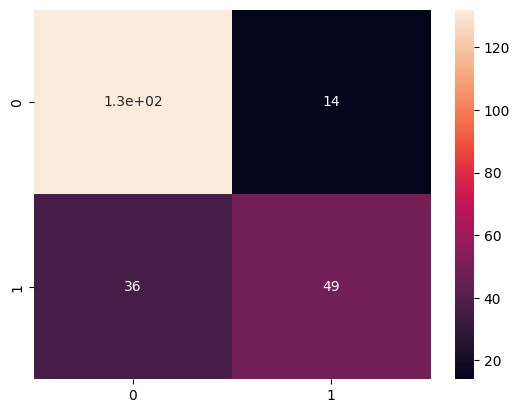

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True)

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.79      0.90      0.84       146\n           1       0.78      0.58      0.66        85\n\n    accuracy                           0.78       231\n   macro avg       0.78      0.74      0.75       231\nweighted avg       0.78      0.78      0.78       231\n'

In [ ]:
df.head()
a=pd.DataFrame([[0,90,140,35,40,20,2.5,23]])
prediction=model.predict(a)
if prediction==1:
  print("You have diabetes")
else:
  print("You dont't have diabetes")

You dont't have diabetes


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Example 6**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/college_student_placement_dataset.csv')
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df.isna().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.dtypes

,0
College_ID,object
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Internship_Experience,object
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,object


<Axes: xlabel='Placement', ylabel='count'>

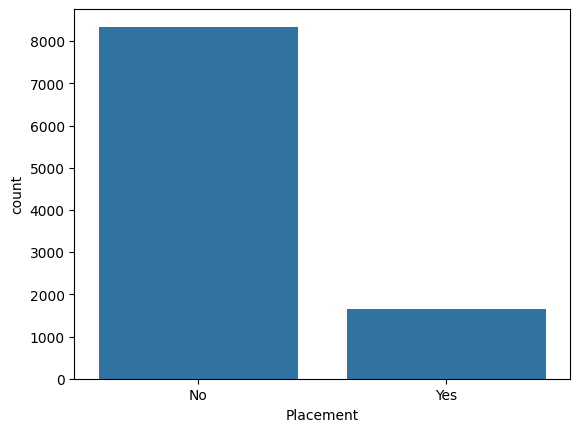

In [ ]:
sn.countplot(df,x='Placement')

In [ ]:
df['Placement']=df['Placement'].replace({'No':0,'Yes':1})

/tmp/ipython-input-4216723437.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Placement']=df['Placement'].replace({'No':0,'Yes':1})


<Axes: xlabel='Internship_Experience', ylabel='count'>

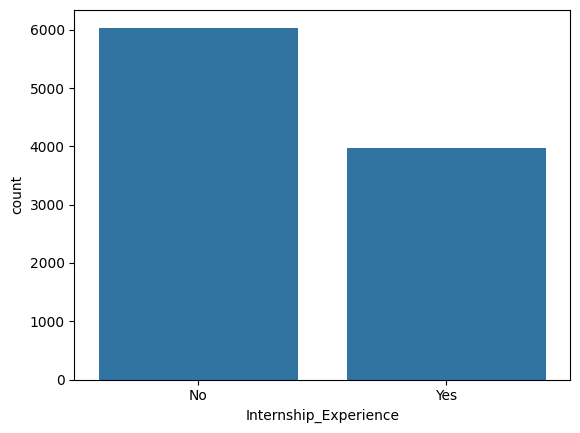

In [ ]:
sn.countplot(df,x='Internship_Experience')

In [ ]:
df['Internship_Experience']=df['Internship_Experience'].replace({'No':0,'Yes':1})

/tmp/ipython-input-1184894701.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Internship_Experience']=df['Internship_Experience'].replace({'No':0,'Yes':1})


In [ ]:
df=df.drop(columns='College_ID')
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


In [ ]:
df.dtypes

,0
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Internship_Experience,int64
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,int64


In [ ]:
x=df.drop(columns='Placement')
x.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,0,8,8,4
1,97,5.52,5.37,8,0,7,8,0
2,109,5.36,5.83,9,0,3,1,1
3,122,5.47,5.75,6,1,1,6,1
4,96,7.91,7.69,7,0,8,10,2


In [ ]:
y=df['Placement']
y.head()

,Placement
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 89.73%


<Axes: >

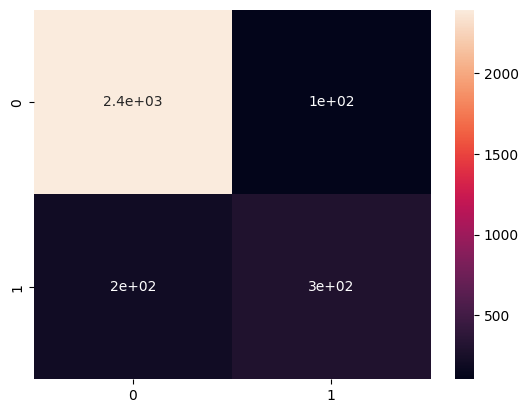

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True)

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.92      0.96      0.94      2498\n           1       0.74      0.59      0.66       502\n\n    accuracy                           0.90      3000\n   macro avg       0.83      0.78      0.80      3000\nweighted avg       0.89      0.90      0.89      3000\n'

In [ ]:
df.head()
a=pd.DataFrame([[150,8.98,8.01,8,0,9,7,10]])
prediction=model.predict(a)
if prediction==1:
  print("Placement Guranteed")
else:
  print("Not eligible for placements")

Placement Guranteed


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Example 7**

# **Spotify**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
df.isna().sum()

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


In [ ]:
df.shape

(8000, 12)

In [ ]:
df.dtypes

,0
user_id,int64
gender,object
age,int64
country,object
subscription_type,object
listening_time,int64
songs_played_per_day,int64
skip_rate,float64
device_type,object
ads_listened_per_week,int64


<Axes: xlabel='gender', ylabel='count'>

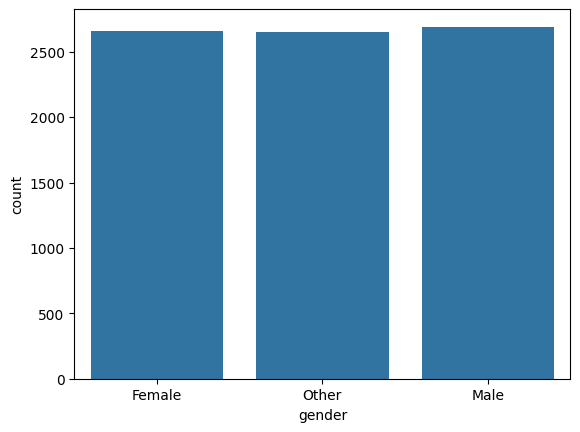

In [ ]:
sn.countplot(df,x='gender')

<Axes: xlabel='country', ylabel='count'>

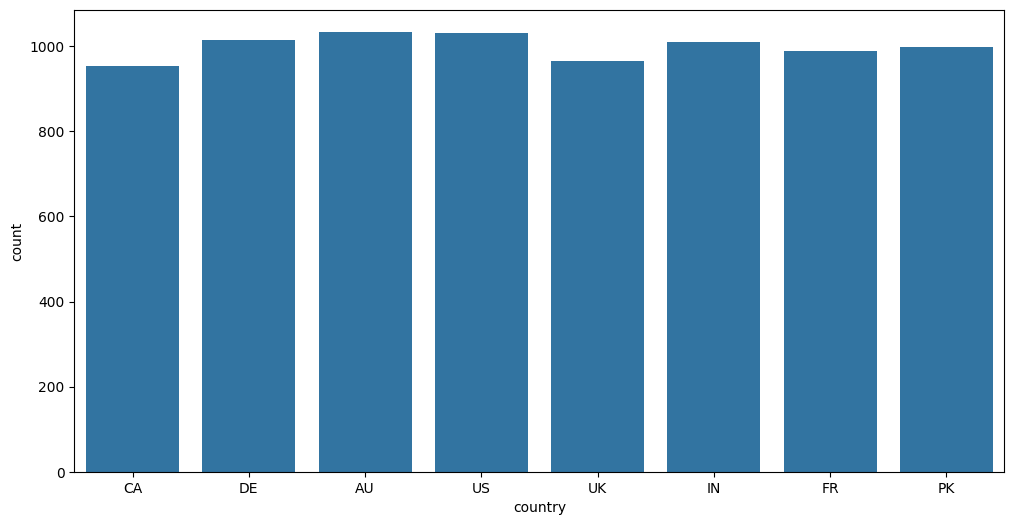

In [ ]:
plt.figure(figsize=(12,6))
sn.countplot(df,x='country')

<Axes: xlabel='subscription_type', ylabel='count'>

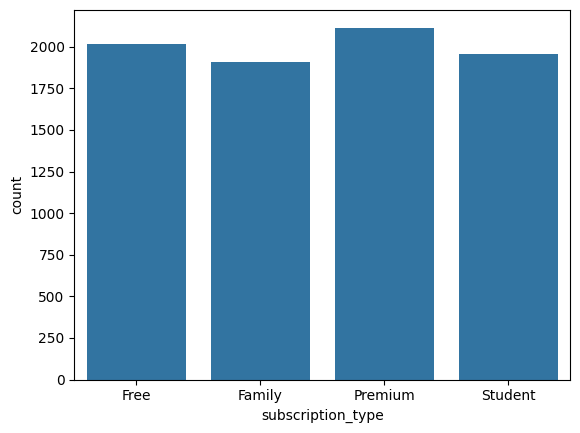

In [ ]:
sn.countplot(df,x='subscription_type')

<Axes: xlabel='device_type', ylabel='count'>

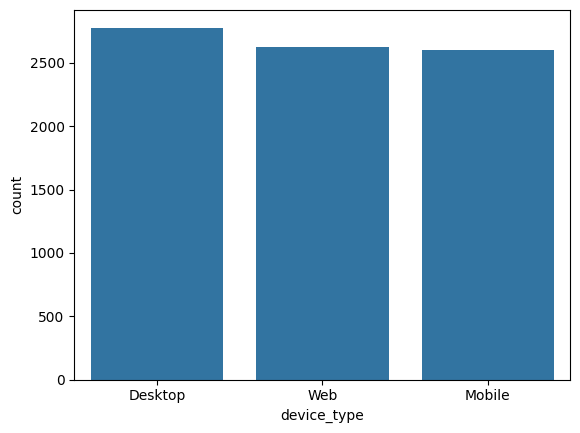

In [ ]:
sn.countplot(df,x='device_type')

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

df['gender']=label_encoder.fit_transform(df['gender'])
df['country']=label_encoder.fit_transform(df['country'])
df['device_type']=label_encoder.fit_transform(df['device_type'])
df['subscription_type']=label_encoder.fit_transform(df['subscription_type'])

In [ ]:
df.dtypes

,0
user_id,int64
gender,int64
age,int64
country,int64
subscription_type,int64
listening_time,int64
songs_played_per_day,int64
skip_rate,float64
device_type,int64
ads_listened_per_week,int64


In [ ]:
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,0,54,1,1,26,23,0.20,0,31,0,1
1,2,2,33,2,0,141,62,0.34,2,0,1,0
2,3,1,38,0,2,199,38,0.04,1,0,1,1
3,4,0,22,1,3,36,2,0.31,1,0,1,0
4,5,2,29,7,0,250,57,0.36,1,0,1,1




*   gender              -> female(0),male(1),other(2)
*   subscription_type   -> family(0),free(1),premium(2),student(3)
*   device_type         -> desktop(0),mobile(1),web(2)



In [ ]:
# df=df.drop(columns='user_id')
# df.head()

In [ ]:
x=df.drop(columns='is_churned')
x.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening
0,1,0,54,1,1,26,23,0.20,0,31,0
1,2,2,33,2,0,141,62,0.34,2,0,1
2,3,1,38,0,2,199,38,0.04,1,0,1
3,4,0,22,1,3,36,2,0.31,1,0,1
4,5,2,29,7,0,250,57,0.36,1,0,1


In [ ]:
y=df['is_churned']
y.head()

,is_churned
0,1
1,0
2,1
3,0
4,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model:{np.round((a*100),2)}%")

Accuracy of the model:74.46%


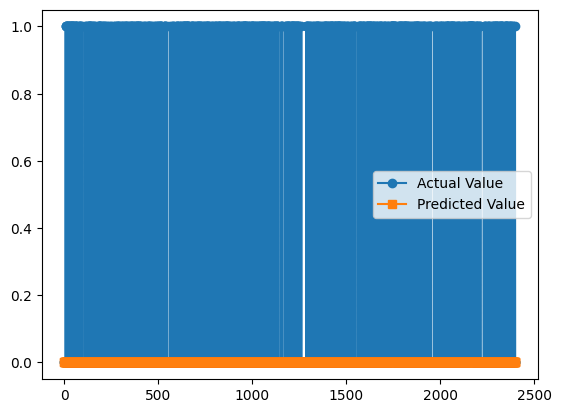

In [ ]:
# w=pd.DataFrame({
#     'Actual Value':y_test.values,
#     "Predicted Value":pred_y
# })
# plt.plot(w['Actual Value'],label="Actual Value",marker='o')
# plt.plot(w['Predicted Value'],label="Predicted Value",marker='s')
# plt.legend()


In [ ]:
y_test.values

array([0, 0, 0, ..., 0, 1, 0])

<Axes: >

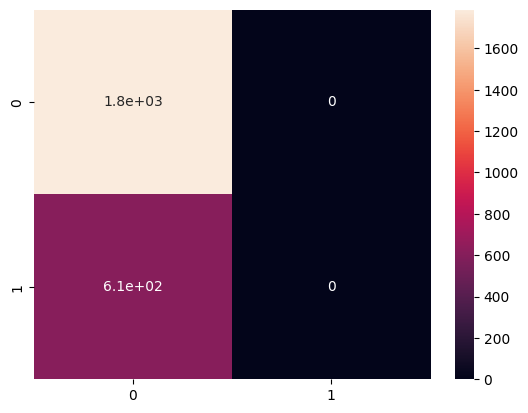

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,pred_y,zero_division=0))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1787
           1       0.00      0.00      0.00       613

    accuracy                           0.74      2400
   macro avg       0.37      0.50      0.43      2400
weighted avg       0.55      0.74      0.64      2400



In [ ]:
flag=0
for i in pred_y:
  if i==1:
    flag+=1
  else:
    flag=0
print(flag)

0


In [ ]:
df.head()
a=pd.DataFrame([[5,1,23,5,2,15,15,0.5,1,10,1]])
predict=model.predict(a)
#print(predict)
if predict==0:
  print("Subscription Cancelled")
else:
  print("Subscription Renewed")

Subscription Cancelled


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
